# Gramener Case Study


![Imgur](https://imgur.com/apRdaMm.jpg)

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Importing the dataset
df = pd.read_csv('loan.csv')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
print(df.shape,'\n')
print(df.info())

(39717, 111) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


## Data cleaning

In [5]:
# checking for missing values
round(df.isnull().mean() * 100,2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

### we can see columns even have 100 % missing values

##### removing the columns having more than 90% missing values

In [6]:
# printing columns having more than 90% missing values
missing_columns = df.columns[round(df.isnull().mean() * 100,2) > 90]
missing_columns

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [7]:
# dropping above columns
df = df.drop(missing_columns, axis=1)

In [8]:
# updated shape of dataframe
print(df.shape)

(39717, 55)


### checking again for percentage of missing values after dropping columns greater than 90% missing values

In [9]:
round(df.isnull().mean() * 100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

##### Still  two columns i.e. 'desc' and 'mths_since_last_delinq ' now remain that have high percentage of missing values
###### lets check them

In [10]:
# checking what desc and mths_since_last_delinq contain
df.loc[:, ['desc', 'mths_since_last_delinq']].head(10)

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0
5,NaN,NaN
6,Borrower added on 12/18/11 > I am planning o...,NaN
7,Borrower added on 12/16/11 > Downpayment for...,NaN
8,Borrower added on 12/21/11 > I own a small h...,NaN
9,Borrower added on 12/16/11 > I'm trying to b...,NaN


since 'desc' is a column of type text and 'mths_since_last_delinq' data is unknown at the time of loan application, it cannot be used as a predictor of default at the time of loan approval.

###### Therefore we drop these two columns as well

In [11]:
df = df.drop(['desc', 'mths_since_last_delinq'], axis=1)

### analysing missing values in rows

In [12]:
df.index[round(df.isnull().sum(axis=1))>5]

Int64Index([], dtype='int64')

###### i.e. no rows have greater than 5 missing values

In [13]:
# new shape after data cleani=sing
df.shape

(39717, 53)

In [14]:
# checking data type of remaining colunmns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [15]:
# checking what int_rate and emp_length contain
df.loc[:, ['int_rate','emp_length']].head(10)

,int_rate,emp_length
0,10.65%,10+ years
1,15.27%,< 1 year
2,15.96%,10+ years
3,13.49%,10+ years
4,12.69%,1 year
5,7.90%,3 years
6,15.96%,8 years
7,18.64%,9 years
8,21.28%,4 years
9,12.69%,< 1 year


In [16]:
# The column int_rate is object type,
#converting to float
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [17]:
df.loc[:, ['int_rate','emp_length']].head(10)

,int_rate,emp_length
0,10.65,10+ years
1,15.27,< 1 year
2,15.96,10+ years
3,13.49,10+ years
4,12.69,1 year
5,7.90,3 years
6,15.96,8 years
7,18.64,9 years
8,21.28,4 years
9,12.69,< 1 year


In [18]:
# checking for null values
round(df['emp_length'].isnull().mean() * 100,2)

2.71

In [19]:
# removing missing values from column 'emp_length'
df = df[~df['emp_length'].isnull()]

A regular expression in a programming language is a special text string used for describing a search pattern.
using regular expression to extract numeric values from string

In [20]:
import re
df['emp_length'] = df['emp_length'].apply(lambda x : re.findall('\d+',str(x))[0])

In [21]:
# The column emp_length is object type, converting it to integer type
df['emp_length'] = df['emp_length'].apply(lambda x : pd.to_numeric(x))

In [22]:
df.loc[:, ['int_rate','emp_length']].head(10)

,int_rate,emp_length
0,10.65,10
1,15.27,1
2,15.96,10
3,13.49,10
4,12.69,1
5,7.90,3
6,15.96,8
7,18.64,9
8,21.28,4
9,12.69,1


#### Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. So, removing those columns is a better idea

In [23]:
non_pred = ["delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec", 
                 "revol_bal", "revol_util", "total_acc", "out_prncp", "out_prncp_inv", "total_pymnt", 
                 "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", 
                 "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt",
                 "last_credit_pull_d",  "application_type"]

In [24]:
# removing behaviour variables
df = df.drop(non_pred,axis=1)

In [25]:
# updated shape of dataframe
df.shape

(38642, 32)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [27]:
df.loc[:, ['title','purpose']].head(10)

,title,purpose
0,Computer,credit_card
1,bike,car
2,real estate business,small_business
3,personel,other
4,Personal,other
5,My wedding loan I promise to pay back,wedding
6,Loan,debt_consolidation
7,Car Downpayment,car
8,Expand Business & Buy Debt Portfolio,small_business
9,Building my credit history.,other


columns title and purpose serve similar purpose so we can drop title column.
Also columns like zip_code, address, state, etc. are useless for prediction

In [28]:
# dropping columns
df = df.drop(['title', 'url', 'zip_code', 'addr_state'],axis=1)

In [29]:
# updated shape
df.shape

(38642, 28)

## Target variable: LOAN STATUS

#### The target variable, which we want to compare across the independent variables, is loan status. 
#### The strategy is to figure out compare the average default rates across various independent variables and identify the ones that affect default rate the most.

In [30]:
# Assessing values associated with target variable
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [31]:
# count of various values associated with loan status
df.loan_status.value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [32]:
# removing 'current' values from column loan status
df = df[df['loan_status']!='Current']

#Labelling Fully paid as 0 and charged off as 1
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

#Converting to numeric type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

In [33]:
#Summarising the values
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

# Univariate analysis

In [34]:
#default percentage 
round(df['loan_status'].mean() * 100,2)

14.38

In [35]:
# function for plotting categorical variable
def cat_var(var):
    sns.barplot(x=var, y='loan_status', data = df)
    plt.show()

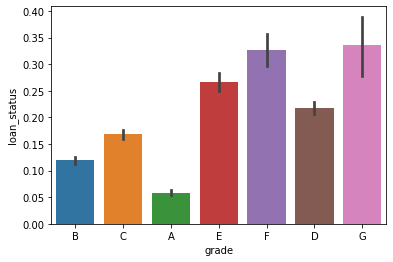

In [36]:
cat_var('grade')

from A to G, the default rate increases which indicates riskiness of the loan.

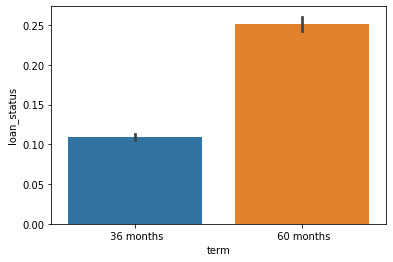

In [37]:
cat_var('term')

60 months loan default rate is more than 36 months loan

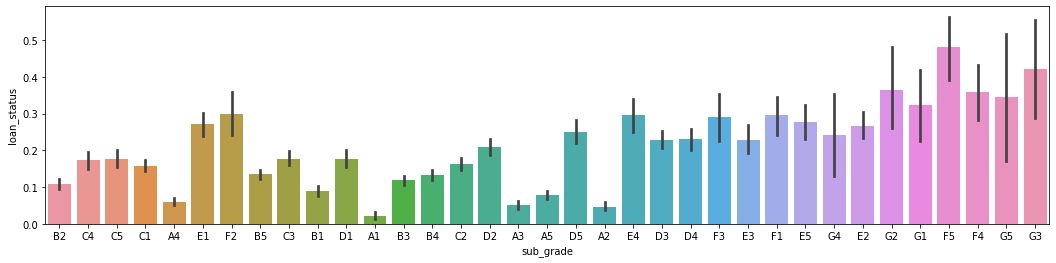

In [38]:
plt.figure(figsize=(18,4))
cat_var('sub_grade')

A1 is better than A2 better than A3 and so on 

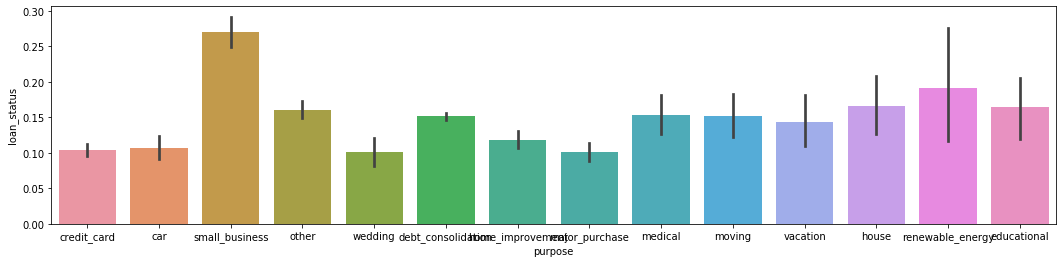

In [39]:
#purpose
plt.figure(figsize=(18,4))
cat_var('purpose')

small business loans defualt the most!

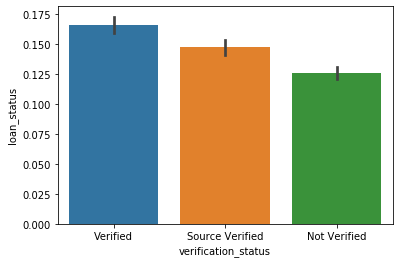

In [40]:
#verification status
cat_var('verification_status')

Verified loan defaults are greater than the one which are not verified!!!

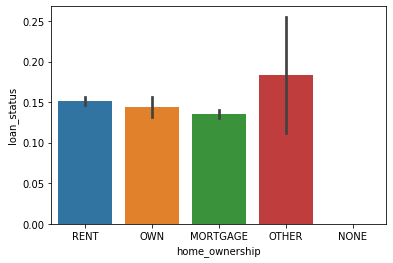

In [41]:
#home-ownership
cat_var('home_ownership')

home_ownership is not of much importance

In [42]:
df.loc[:, ['issue_d']].head(10)

,issue_d
0,Dec-11
1,Dec-11
2,Dec-11
3,Dec-11
5,Dec-11
6,Dec-11
7,Dec-11
8,Dec-11
9,Dec-11
10,Dec-11


In [43]:
df['issue_d'].dtype

dtype('O')

converting issue_d column into date and time format and then extracting year and month from it

In [44]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [45]:
#extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [46]:
df['month'].value_counts()

12    4120
11    3890
10    3637
9     3394
8     3321
7     3253
6     3094
5     2838
4     2756
3     2632
1     2331
2     2278
Name: month, dtype: int64

In [47]:
df['year'].value_counts()

2011    19801
2010    11214
2009     4716
2008     1562
2007      251
Name: year, dtype: int64

 number of loans has increased steadily across years.

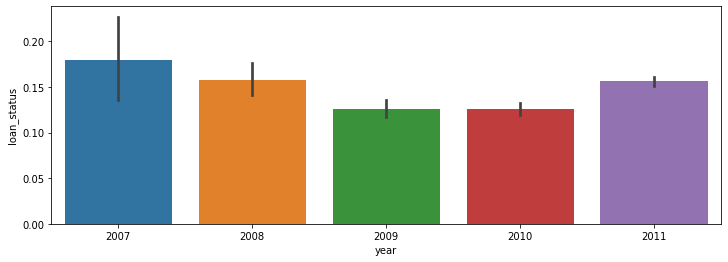

In [48]:
#Default rate accross years
plt.figure(figsize=(12,4))
cat_var('year')

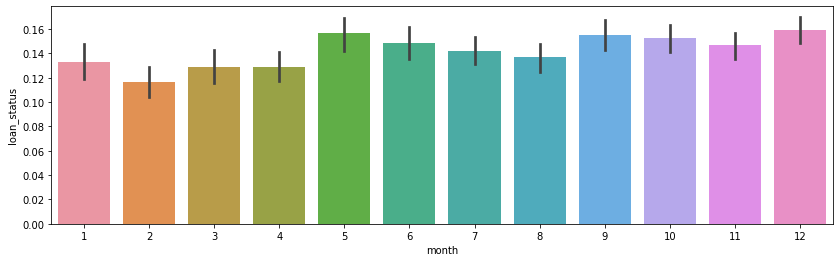

In [49]:
#comparing defaults accross months
plt.figure(figsize=(14,4))
cat_var('month')

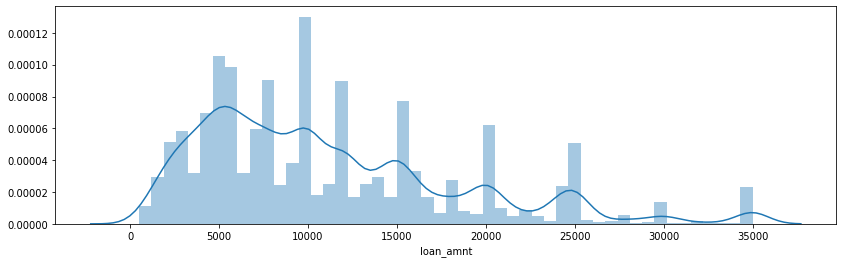

In [50]:
# variation across continuous variables.
plt.figure(figsize=(14,4))
sns.distplot(df['loan_amnt'])
plt.show()

## Binning loan amount variable into small, medium, high and  very high discrete categories

In [51]:
#binnig the loan amount
def binned(n):
    if n<5000:
        return 'low'
    elif n>5000 and n<15000:
        return 'medium'
    elif n>15000 and n<25000:
        return 'high'
    else:
        return 'very high'

df['loan_amnt'] = df['loan_amnt'].apply(lambda x: binned(x))   

In [52]:
df['loan_amnt'].value_counts()

medium       18198
low           7095
very high     6484
high          5767
Name: loan_amnt, dtype: int64

In [53]:
# let's also convert funded amount invested to bins
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: binned(x))

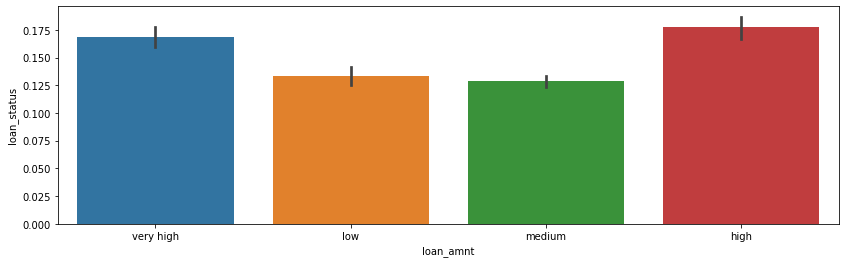

In [54]:
plt.figure(figsize=(14,4))
cat_var('loan_amnt')

Higher the loan amount, higher the default rate

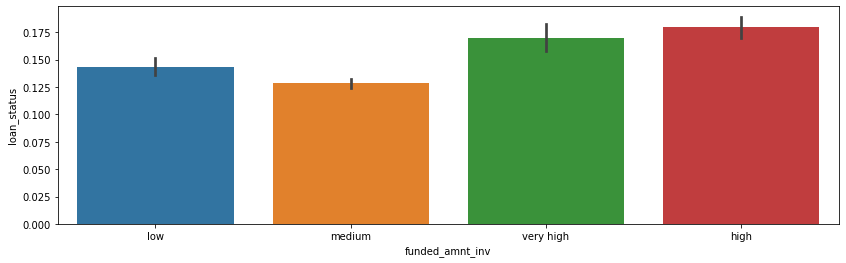

In [55]:
# funded amount invested
plt.figure(figsize=(14,4))
cat_var('funded_amnt_inv')

In [56]:
# Binning interest rate to low, medium, high
def rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: rate(x))

In [57]:
# binnng debt to income ratio
def ratio(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: ratio(x))

In [58]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

In [59]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

In [60]:
#checking for null values
df['emp_length'].isnull().sum()

0

In [61]:
# binning emp_length
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))

In [62]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

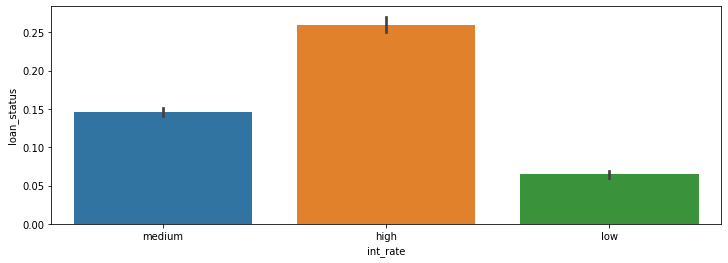

In [63]:
plt.figure(figsize=(12,4))
cat_var('int_rate')

High interest rates default more!

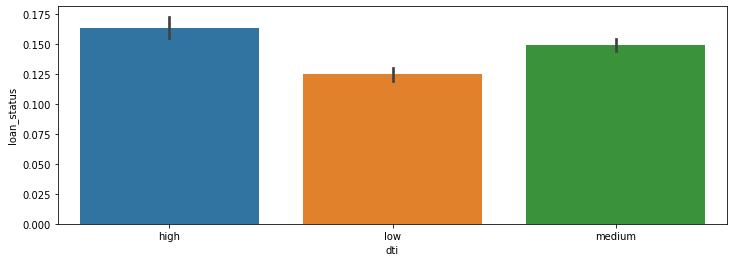

In [64]:
plt.figure(figsize=(12,4))
cat_var('dti')

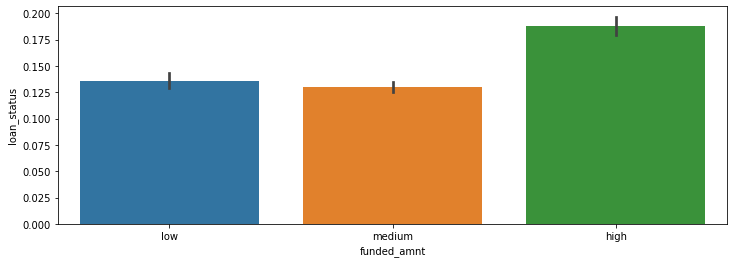

In [65]:
plt.figure(figsize=(12,4))
cat_var('funded_amnt')

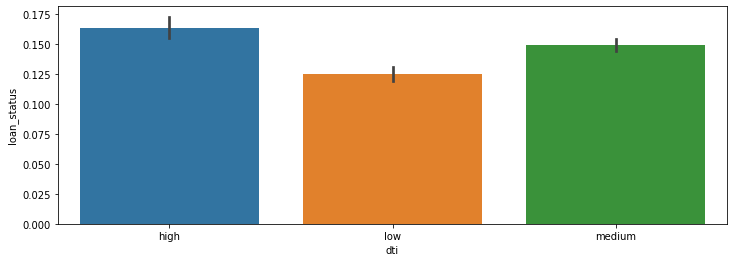

In [66]:
plt.figure(figsize=(12,4))
cat_var('dti')

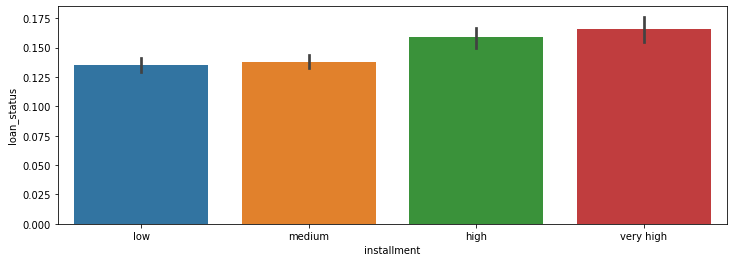

In [67]:
plt.figure(figsize=(12,4))
cat_var('installment')

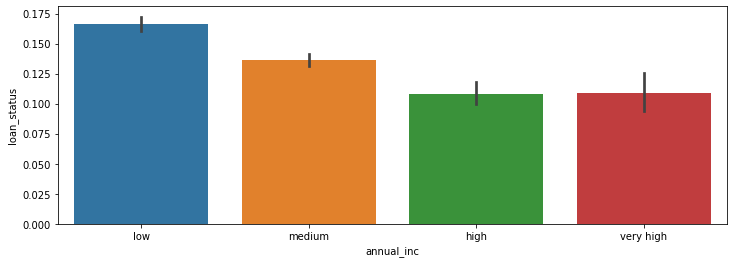

In [68]:
plt.figure(figsize=(12,4))
cat_var('annual_inc')

Lower the annual income, higher the default rate

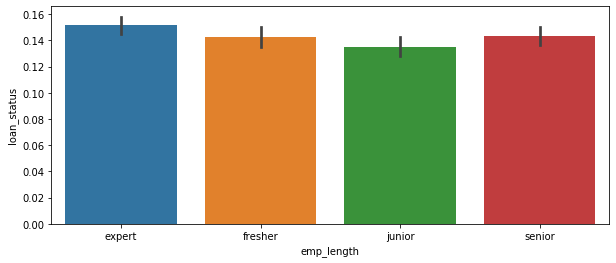

In [69]:
plt.figure(figsize=(10,4))
cat_var('emp_length')

emp_length is not a good predictor of default

# SEGMENTED UNIVARIATE ANALYSIS

#### some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

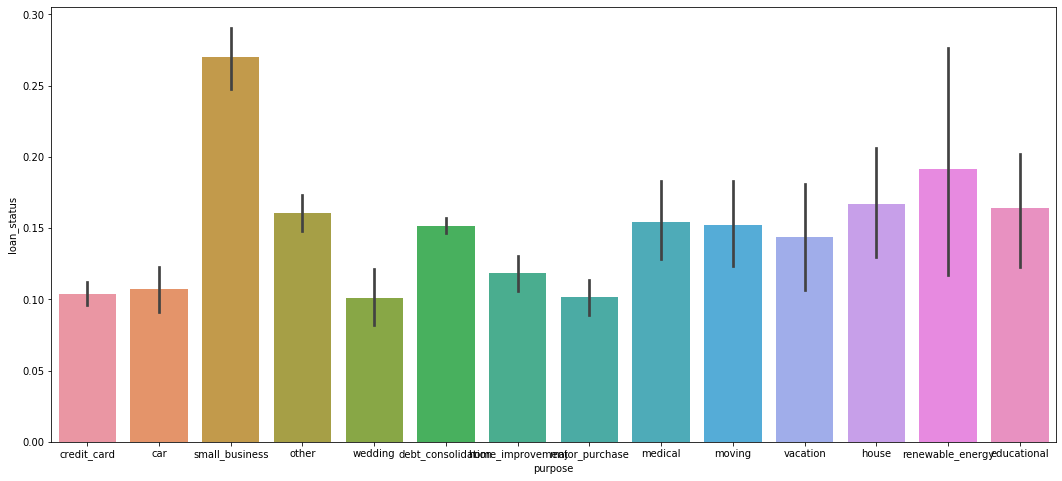

In [70]:
# purpose: 
plt.figure(figsize=(18, 8))
cat_var('purpose')

small business loans defualt the most, then renewable energy and education

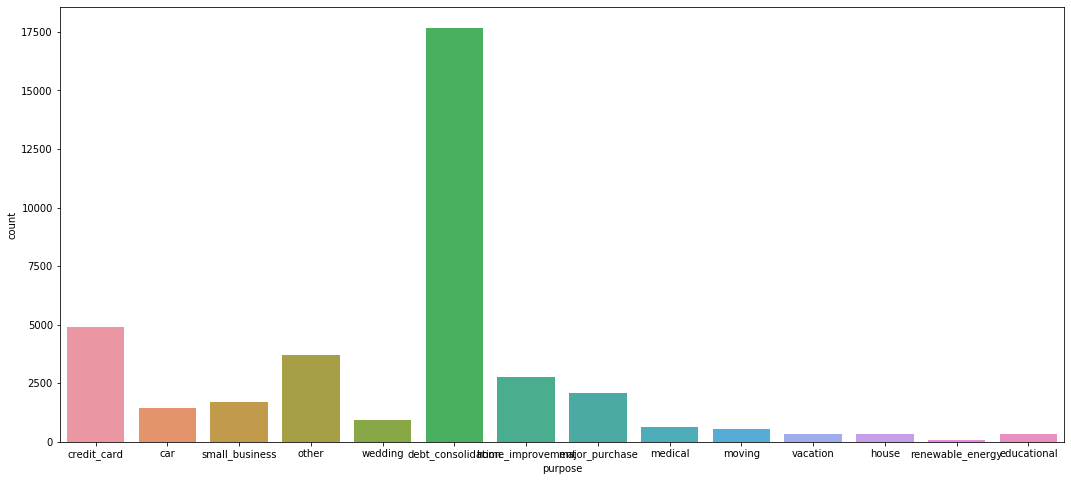

In [71]:
# number of loans for each type (purpose) of the loan
plt.figure(figsize=(18, 8))
sns.countplot(x='purpose', data=df)
plt.show()

#### top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In [72]:
main_purp = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purp)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

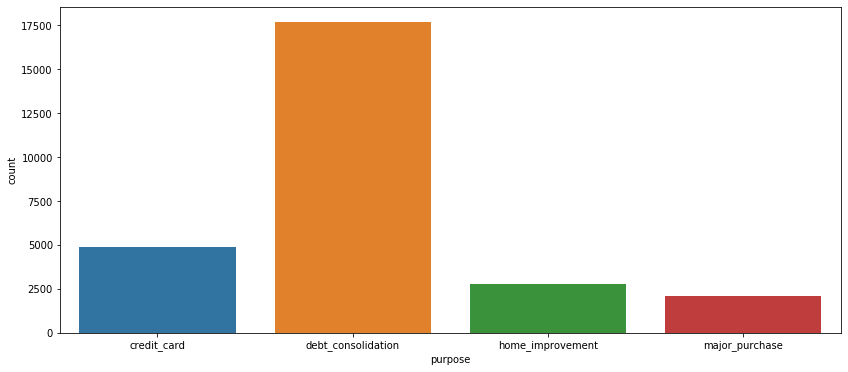

In [73]:
# plotting number of loans by purpose
plt.figure(figsize=(14, 6))
sns.countplot(x=df['purpose'])
plt.show()

In [74]:
# function which takes a categorical variable and plots the default rate segmented by purpose 

def seg(cat_var):
    plt.figure(figsize=(18, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

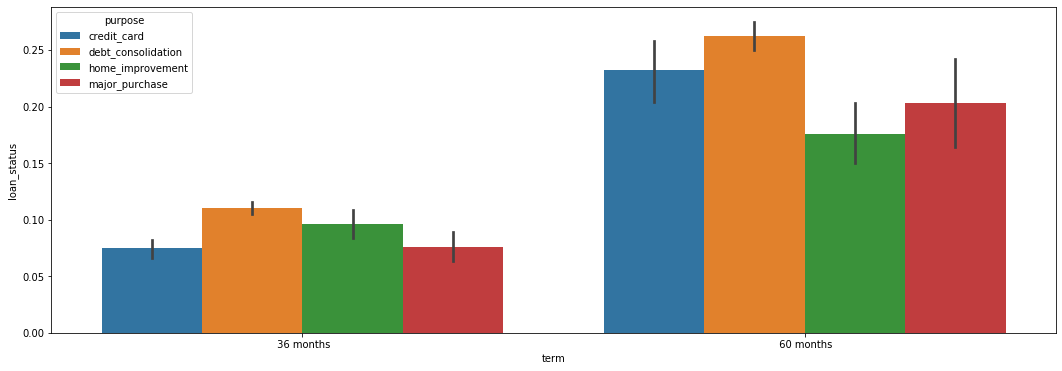

In [75]:
# comparing the default rates across two categorical variables i.e.
# purpose of loan (constant) and another categorical variable (which changes)
seg('term')

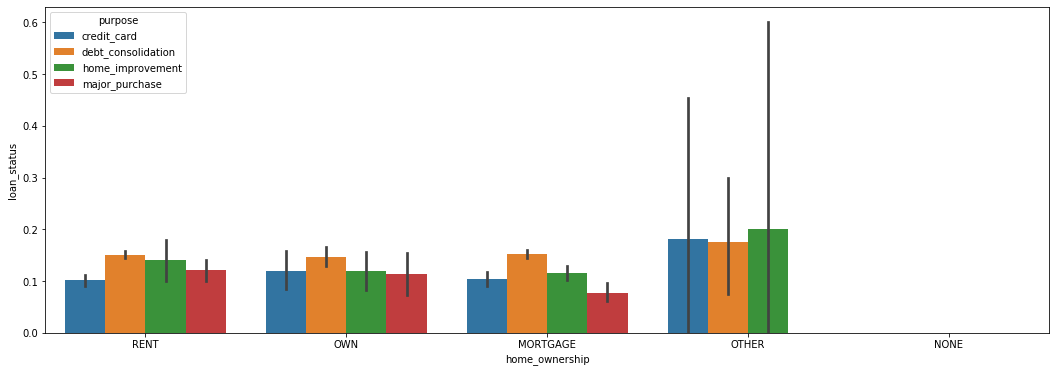

In [77]:
seg('home_ownership')

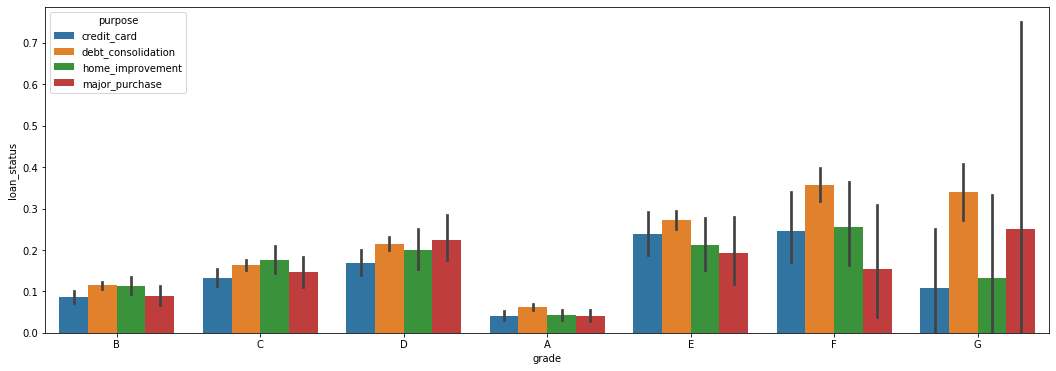

In [78]:
seg('grade')

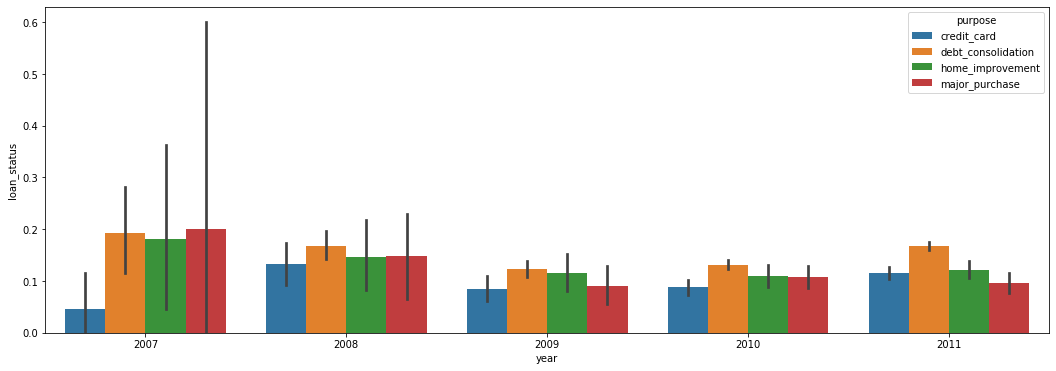

In [79]:
seg('year')

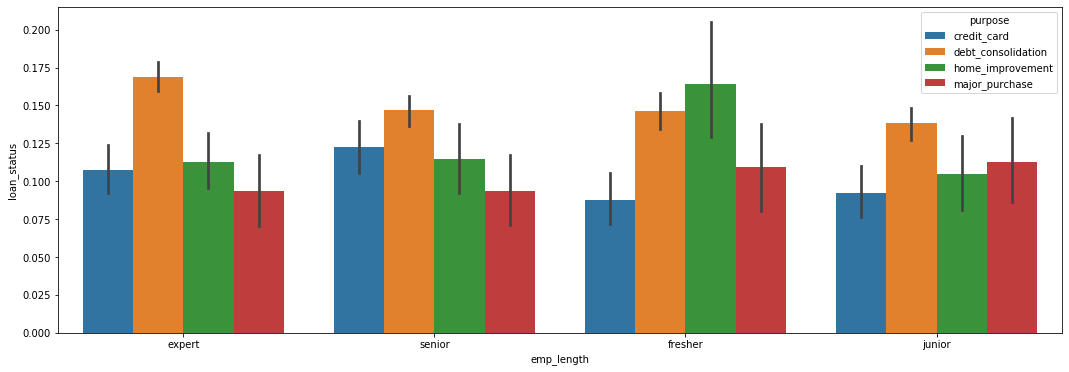

In [80]:
seg('emp_length')

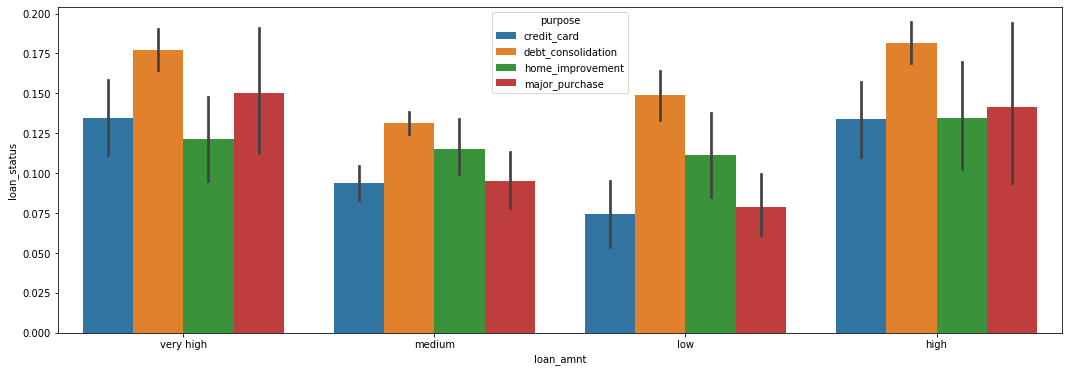

In [81]:
seg('loan_amnt')

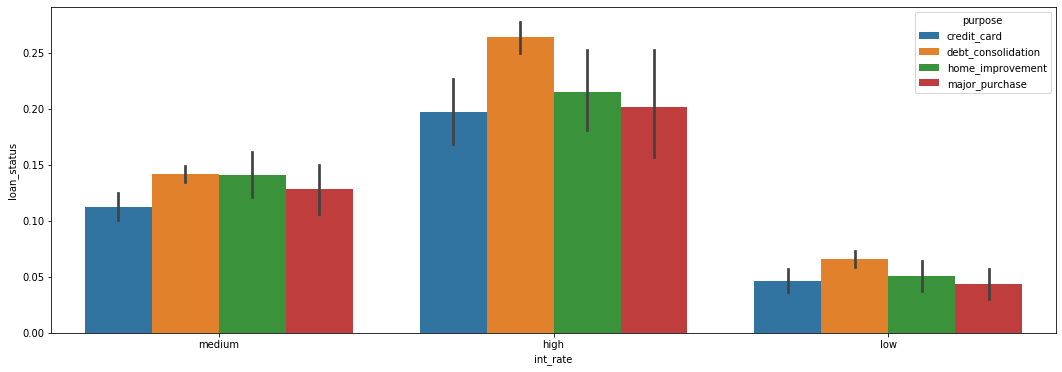

In [82]:
seg('int_rate')

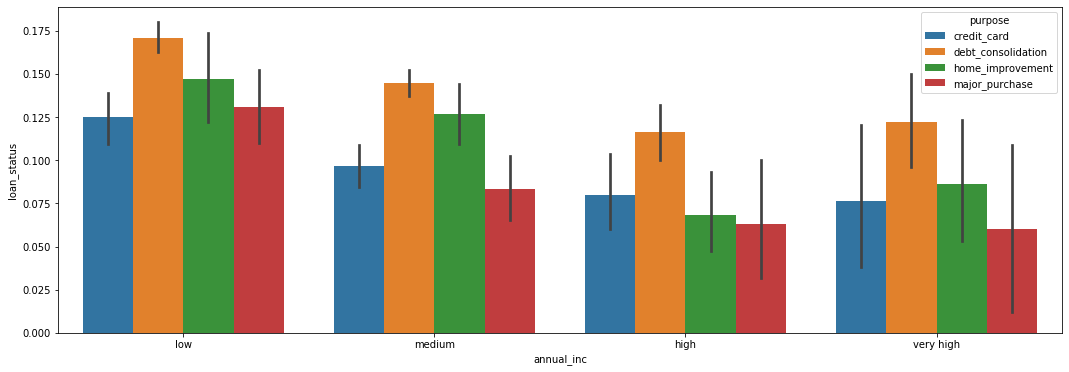

In [83]:
seg('annual_inc')

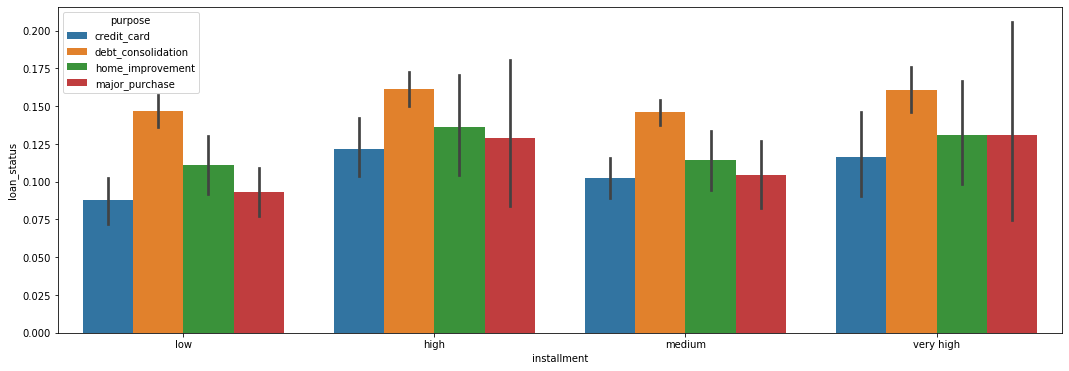

In [84]:
seg('installment')

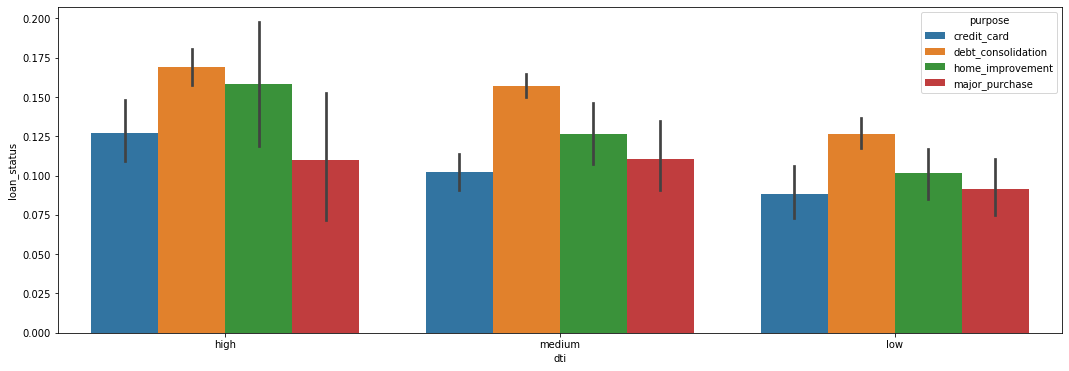

In [85]:
seg('dti')

### checking variation of the default rate across the categories

In [86]:
# function takes in a categorical variable and computes the mean  default rate across the categories
def diff(cat_var):
    default_rates = df.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff('annual_inc')
print(default_rates) 
print(diff)

annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


### Thus, there is a 6% increase in default rate as you go from high to low annual income.